In [8]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [9]:
target = pd.read_csv(r'files_for_lab\target.csv')
cols = []
for i in range(len(target.columns)):
    cols.append(target.columns[i].lower().replace(' ', '_'))
target.columns = cols
target

,target_b,target_d
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [10]:
target.groupby('target_b').count()

,target_d
target_b,
0,90569
1,4843


In [11]:
target_1 = target[target['target_b'] == 1]
target_1['target_d'].describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: target_d, dtype: float64

In [12]:
target_0 = target[target['target_b'] == 0]
target_0['target_d'].describe()

count    90569.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: target_d, dtype: float64

In [13]:
correlation = target.corr()['target_b']
correlation

target_b    1.000000
target_d    0.774232
Name: target_b, dtype: float64

In [15]:
numerical = pd.read_csv(r'files_for_lab\numerical.csv')
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [16]:
categorical = pd.read_csv(r'files_for_lab\categorical.csv')
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [17]:
df = pd.concat([target, numerical], axis = 1)
pd.set_option('display.max_columns', None)
df

,target_b,target_d,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,0.0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,0,0.0,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,0,0.0,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,

In [18]:
df.isna().sum().sum()

0

In [19]:
df.duplicated().sum()

0

In [21]:
correlations_matrix = df.corr()['target_d']

# Filtering by the threshold
high_correlations = correlations_matrix[correlations_matrix >= 0.05] # correlations are very low
print(high_correlations.sort_values(ascending=False))

target_d    1.000000
target_b    0.774232
lastgift    0.061678
Name: target_d, dtype: float64


In [22]:
df_target_1 = df[df['target_b'] == 1]
df_target_1.describe()

,target_b,target_d,tcode,age,income,wealth1,hit,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,cardprom,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,maxramnt,lastgift,timelag,avggift,controln,hphone_d,rfa_2f,cluster2
count,4843.0,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.00000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.00000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.00

In [23]:
df_target_0 = df[df['target_b'] == 0]
df_target_0.describe()

,target_b,target_d,tcode,age,income,wealth1,hit,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,cardprom,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,maxramnt,lastgift,timelag,avggift,controln,hphone_d,rfa_2f,cluster2
count,90569.0,90569.0,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.00000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.

In [24]:
target_0 = df_target_0.drop(['target_d'], axis = 1)
target_1 = df_target_1.drop(['target_d'], axis = 1)

import scipy.stats as stats

results = []

for column in target_0.columns:
    t_stat, p_value = stats.ttest_ind(target_0[column], target_1[column], equal_var=False)
    results.append((column, t_stat, p_value))

results_df = pd.DataFrame(results, columns=['Column', 'T-Statistic', 'P-Value'])
results_df

,Column,T-Statistic,P-Value
0,target_b,-inf,0.000000e+00
1,tcode,-1.265558,2.057281e-01
2,age,-2.550255,1.079165e-02
3,income,-5.186482,2.221329e-07
4,wealth1,-1.195278,2.320312e-01
...,...,...,...
311,avggift,10.600237,5.319415e-26
312,controln,-3.867748,1.111580e-04
313,hphone_d,0.810985,4.174100e-01
314,rfa_2f,-20.815729,1.462151e-92


In [25]:
significant_results = results_df[results_df['P-Value'] <= 0.05]
significant_results

,Column,T-Statistic,P-Value
0,target_b,-inf,0.000000e+00
2,age,-2.550255,1.079165e-02
3,income,-5.186482,2.221329e-07
9,wwiivets,-2.064198,3.904713e-02
10,localgov,2.240313,2.511111e-02
...,...,...,...
310,timelag,4.438837,9.213157e-06
311,avggift,10.600237,5.319415e-26
312,controln,-3.867748,1.111580e-04
314,rfa_2f,-20.815729,1.462151e-92


In [26]:
significant_results['Column'].unique()

array(['target_b', 'age', 'income', 'wwiivets', 'localgov', 'fedgov',
       'eth1', 'eth2', 'eth10', 'age901', 'age902', 'age903', 'age904',
       'age905', 'age906', 'age907', 'agec1', 'agec2', 'agec5', 'agec6',
       'hhage1', 'hhage3', 'hhn2', 'hhn3', 'hhn4', 'hhn5', 'hhn6',
       'marr1', 'marr4', 'dw3', 'dw8', 'hv1', 'hv2', 'hv3', 'hv4', 'hu1',
       'hu5', 'hhd1', 'hhd3', 'hhd7', 'hhd9', 'ethc2', 'ethc3', 'ethc4',
       'ethc5', 'ethc6', 'hvp1', 'hvp2', 'hvp3', 'hvp4', 'hvp5', 'hvp6',
       'hur2', 'rhp1', 'rhp2', 'rhp4', 'hupa5', 'rp1', 'rp2', 'rp3',
       'rp4', 'msa', 'adi', 'dma', 'ic1', 'ic2', 'ic3', 'ic4', 'ic5',
       'ic6', 'ic7', 'ic8', 'ic10', 'ic11', 'ic12', 'ic13', 'ic14',
       'ic15', 'ic16', 'ic17', 'ic19', 'ic20', 'ic21', 'ic22', 'ic23',
       'hhas2', 'hhas3', 'hhas4', 'mc1', 'mc2', 'mc3', 'tpe1', 'tpe2',
       'tpe3', 'tpe4', 'tpe9', 'lfc7', 'lfc10', 'occ1', 'occ2', 'occ4',
       'occ8', 'occ11', 'occ12', 'occ13', 'eic9', 'eic12', 'eic15',
       'o

In [27]:
df_target_1 = df_target_1[['target_d', 'age', 'income', 'wwiivets', 'localgov', 'fedgov',
       'eth1', 'eth2', 'eth10', 'age901', 'age902', 'age903', 'age904',
       'age905', 'age906', 'age907', 'agec1', 'agec2', 'agec5', 'agec6',
       'hhage1', 'hhage3', 'hhn2', 'hhn3', 'hhn4', 'hhn5', 'hhn6',
       'marr1', 'marr4', 'dw3', 'dw8', 'hv1', 'hv2', 'hv3', 'hv4', 'hu1',
       'hu5', 'hhd1', 'hhd3', 'hhd7', 'hhd9', 'ethc2', 'ethc3', 'ethc4',
       'ethc5', 'ethc6', 'hvp1', 'hvp2', 'hvp3', 'hvp4', 'hvp5', 'hvp6',
       'hur2', 'rhp1', 'rhp2', 'rhp4', 'hupa5', 'rp1', 'rp2', 'rp3',
       'rp4', 'msa', 'adi', 'dma', 'ic1', 'ic2', 'ic3', 'ic4', 'ic5',
       'ic6', 'ic7', 'ic8', 'ic10', 'ic11', 'ic12', 'ic13', 'ic14',
       'ic15', 'ic16', 'ic17', 'ic19', 'ic20', 'ic21', 'ic22', 'ic23',
       'hhas2', 'hhas3', 'hhas4', 'mc1', 'mc2', 'mc3', 'tpe1', 'tpe2',
       'tpe3', 'tpe4', 'tpe9', 'lfc7', 'lfc10', 'occ1', 'occ2', 'occ4',
       'occ8', 'occ11', 'occ12', 'occ13', 'eic9', 'eic12', 'eic15',
       'oedc1', 'oedc4', 'ec1', 'ec2', 'ec3', 'ec4', 'ec5', 'ec6', 'ec7',
       'ec8', 'sec2', 'sec4', 'afc4', 'afc5', 'vc2', 'vc3', 'vc4', 'anc2',
       'anc8', 'anc9', 'anc13', 'pobc2', 'voc1', 'voc2', 'hc2', 'hc3',
       'hc4', 'hc5', 'hc6', 'hc7', 'hc8', 'hc9', 'hc10', 'hc20', 'hc21',
       'mhuc1', 'ac1', 'cardprom', 'numprom', 'cardpm12', 'numprm12',
       'ramntall', 'ngiftall', 'cardgift', 'minramnt', 'maxramnt',
       'lastgift', 'timelag', 'avggift', 'controln', 'rfa_2f', 'cluster2']]
df_target_1

,target_d,age,income,wwiivets,localgov,fedgov,eth1,eth2,eth10,age901,age902,age903,age904,age905,age906,age907,agec1,agec2,agec5,agec6,hhage1,hhage3,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr4,dw3,dw8,hv1,hv2,hv3,hv4,hu1,hu5,hhd1,hhd3,hhd7,hhd9,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur2,rhp1,rhp2,rhp4,hupa5,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic19,ic20,ic21,ic22,ic23,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe9,lfc7,lfc10,occ1,occ2,occ4,occ8,occ11,occ12,occ13,eic9,eic12,eic15,oedc1,oedc4,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec2,sec4,afc4,afc5,vc2,vc3,vc4,anc2,anc8,anc9,anc13,pobc2,voc1,voc2,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc20,hc21,mhuc1,ac1,cardprom,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,maxramnt,lastgift,timelag,avggift,controln,rfa_2f,cluster2
20,4.0,62.000000,3,27,11,1,97,1,1,35,42,43,37,47,50,27,9,20,8,6,16,15,30,47,29,11,2,55,22,1,8,902,960,8,8,88,11,42,60,8,7,58,17,0,1,0,0,4,35,74,99,0,64,63,62,4,1,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,11,7,1,2,4,6,13,25,14,8,1,1,2,66,1,61,39,20,74,17,2,2,4,65,1,21,20,11,10,3,2,1,7,1,7,11,4,140,5,3,24,21,9,32,7,23,16,12,25,20,27,7,0,1,4,0,58,95,69,13,2,17,35,91,99,1,12,3,99,99,9,6,26,65,5,12,61.00,15,10,2.00,7.0,5.0,12,4.066667,82943,3,3
30,7.0,61.611649,5,16,8,5,94,2,0,29,36,37,27,38,40,37,8,34,6,2,5,3,23,71,47,15,6,77,17,0,0,1002,1166,7,5,97,3,63,88,4,3,60,4,1,2,0,4,15,50,94,99,2,91,70,72,4,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,48,19,7,0,1,3,4,0,51,19,7,0,1,0,65,3,74,26,25,89,9,0,0,2,61,0,34,23,10,9,1,1,0,8,3,9,8,5,160,0,1,12,25,10,39,13,33,25,19,37,11,16,10,4,2,0,0,48,99,91,6,6,57,85,95,95,5,0,0,99,99,12,1,10,24,0,2,68.00,11,6,2.00,10.0,7.0,9,6.181818,190313,3,14
45,5.0,66.000000,5,39,6,1,99,0,0,42,47,49,40,48,50,20,7,14,17,13,24,22,43,35,19,6,1,72,16,1,0,1282,1399,5,4,96,8,27,71,2,2,62,21,0,0,0,15,33,74,88,98,2,70,67,67,3,2,39,57,71,89,1360.0,173.0,637.0,550,637,607,703,26007,5,11,19,24,17,5,3,5,1,5,16,28,22,6,5,6,1,76,1,61,39,12,89,7,0,0,3,67,0,25,24,13,6,1,3,1,7,2,8,6,11,151,2,4,21,20,7,31,15,14,13,16,33,26,39,3,7,0,1,0,66,98,67,11,8,40,49,81,93,7,36,0,99,97,11,9,31,74,5,13,102.00,21,14,3.00,6.0,5.0,3,4.857143,76585,3,11
78,13.0,69.000000,6,54,2,1,97,0,0,40,44,46,42,47,49,14,8,21,13,13,26,24,44,27,13,4,1,54,27,8,0,5000,5471,10,10,63,30,18,50,4,2,63,23,0,0,0,99,99,99,99,99,95,51,59,56,4,10,92,94,95,96,5945.0,13.0,803.0,738,963,797,959,50907,9,7,8,15,13,10,6,20,4,4,5,16,17,11,9,28,1,60,5,55,45,9,85,6,0,0,7,44,3,24,29,25,4,0,1,1,21,3,12,4,16,160,1,3,9,23,7,36,21,17,10,16,32,18,45,5,9,3,1,1,48,97,67,27,0,9,14,38,63,37,8,1,99,99,8,7,22,61,6,13,132.00,12,5,5.00,17.0,10.0,21,11.000000,156378,2,2
93,10.0,73.000000,1,8,5,11,7,93,0,29,39,42,31,40,45,30,18,18,9,4,14,10,21,72,50,24,13,47,34,0,0,685,698,5,5,89,0,55,60,19,16,3,3,24,65,4,0,0,4,32,90,0,84,67,68,5,0,69,84,98,99,520.0,197.0,524.0,409,422,436,463,12546,8,13,13,20,10,1,0,0,4,10,15,21,12,1,0,0,3,32,4,39,61,7,71,12,14,14,2,46,18,7,18,8,14,5,10,6,8,0,4,5,3,120,5,17,38,17,1,16,7,21,20,10,21,18,8,22,1,0,0,0,71,96,76,28,0,0,0,8,66,34,0,0,99,99,7,7,19,46,6,14,94.00,10,8,5.00,12.0,12.0,6,9.400000,25641,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,20.0,45.000000,5,37,9,3,94,1,0,39,50,55,42,52,55,23,10,17,11,14,37,35,37,30,17,7,3,49,17,6,6,653,752,4,4,57,33,28,44,11,9,45,30,0,1,0,2,5,14,

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols

y = df_target_1['target_d']
X = df_target_1.drop(['target_d'], axis=1)

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = sm.OLS(y_train, X_train).fit()

summary = model.summary()

p_values = model.pvalues

significant_vars = p_values[p_values <= 0.05]

significant_vars

const       4.245851e-12
agec5       3.044686e-02
hhd1        4.784054e-02
adi         4.180352e-02
dma         6.448923e-05
ic5         1.826468e-02
oedc1       3.552802e-02
hc20        8.919099e-03
cardpm12    1.286463e-02
ramntall    6.255433e-23
ngiftall    5.148044e-06
minramnt    1.030937e-19
maxramnt    8.388381e-03
lastgift    6.975054e-52
avggift     1.636856e-06
controln    2.590617e-02
rfa_2f      6.202465e-33
dtype: float64

In [29]:
significant_vars.keys()

Index(['const', 'agec5', 'hhd1', 'adi', 'dma', 'ic5', 'oedc1', 'hc20',
       'cardpm12', 'ramntall', 'ngiftall', 'minramnt', 'maxramnt', 'lastgift',
       'avggift', 'controln', 'rfa_2f'],
      dtype='object')

In [30]:
numerical_metrics = df[['agec5', 'hhd1', 'adi', 'dma', 'ic5', 'oedc1', 'hc20',
       'cardpm12', 'ramntall', 'ngiftall', 'minramnt', 'maxramnt', 'lastgift',
       'avggift', 'controln', 'rfa_2f']]

In [31]:
df2 = pd.concat([target, numerical_metrics, categorical], axis = 1)
df2.columns = df2.columns.str.lower().str.replace(' ', '_')
df2

,target_b,target_d,agec5,hhd1,adi,dma,ic5,oedc1,hc20,cardpm12,ramntall,ngiftall,minramnt,maxramnt,lastgift,avggift,controln,rfa_2f,state,cluster,homeownr,gender,datasrce,rfa_2r,rfa_2a,geocode2,domain_a,domain_b,odatew_yr,odatew_mm,dob_yr,dob_mm,minrdate_yr,minrdate_mm,maxrdate_yr,maxrdate_mm,lastdate_yr,lastdate_mm,firstdate_yr,firstdate_mm
0,0,0.0,13,38,177.0,682.0,12883,10,99,6,240.0,31,5.0,12.0,10.0,7.741935,95515,4,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,0,0.0,10,59,13.0,803.0,36175,6,99,6,47.0,3,10.0,25.0,25.0,15.666667,148535,2,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,0,0.0,13,36,281.0,518.0,11576,6,97,6,202.0,27,2.0,16.0,5.0,7.481481,15078,4,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,0,0.0,12,36,67.0,862.0,15130,3,93,6,109.0,16,2.0,11.0,10.0,6.812500,172556,4,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,0,0.0,20,42,127.0,528.0,9836,26,99,10,254.0,37,3.0,15.0,15.0,6.864865,7112,2,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0.0,8,44,0.0,743.0,18807,7,99,5,25.0,1,25.0,25.0,25.0,25.000000,184568,1,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2
95408,0,0.0,7,63,201.0,618.0,26538,4,99,3,20.0,1,20.0,20.0,20.0,20.000000,122706,1,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3
95409,0,0.0,9,37,61.0,551.0,12178,7,99,7,58.0,7,3.0,10.0,10.0,8.285714,189641,3,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10
95410,1,18.0,12,44,13.0,803.0,15948,9,99,9,498.0,41,5.0,21.0,18.0,12.146341,4693,4,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12


In [32]:
numericalX = df2.select_dtypes(include = [np.number])
categoricalX = df2.select_dtypes(exclude = [np.number])

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')

encoded_categorical = encoder.fit_transform(categoricalX)

encoded_feature_names = encoder.get_feature_names_out(input_features=categoricalX.columns)

encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoded_feature_names)

df2_encoded = pd.concat([numericalX.reset_index(drop=True), encoded_categorical_df], axis=1)
df2_encoded

,target_b,target_d,agec5,hhd1,adi,dma,ic5,oedc1,hc20,cardpm12,ramntall,ngiftall,minramnt,maxramnt,lastgift,avggift,controln,rfa_2f,cluster,datasrce,domain_b,odatew_yr,odatew_mm,dob_yr,dob_mm,minrdate_yr,minrdate_mm,maxrdate_yr,maxrdate_mm,lastdate_yr,lastdate_mm,firstdate_yr,firstdate_mm,state_FL,state_GA,state_IL,state_IN,state_MI,state_MO,state_NC,state_TX,state_WA,state_WI,state_other,homeownr_U,gender_M,gender_other,rfa_2a_E,rfa_2a_F,rfa_2a_G,geocode2_B,geocode2_C,geocode2_D,domain_a_R,domain_a_S,domain_a_T,domain_a_U
0,0,0.0,13,38,177.0,682.0,12883,10,99,6,240.0,31,5.0,12.0,10.0,7.741935,95515,4,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0.0,10,59,13.0,803.0,36175,6,99,6,47.0,3,10.0,25.0,25.0,15.666667,148535,2,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,13,36,281.0,518.0,11576,6,97,6,202.0,27,2.0,16.0,5.0,7.481481,15078,4,43,3,2,90,1,0,2,91,11,92,7,95,12,90,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,0.0,12,36,67.0,862.0,15130,3,93,6,109.0,16,2.0,11.0,10.0,6.812500,172556,4,44,3,2,87,1,28,1,87,11,94,11,95,12,87,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0.0,20,42,127.0,528.0,9836,26,99,10,254.0,37,3.0,15.0,15.0,6.864865,7112,2,16,3,2,86,1,20,1,93,10,96,1,96,1,79,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0.0,8,44,0.0,743.0,18807,7,99,5,25.0,1,25.0,25.0,25.0,25.000000,184568,1,27,3,2,96,1,0,2,96,2,96,2,96,2,96,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95408,0,0.0,7,63,201.0,618.0,26538,4,99,3,20.0,1,20.0,20.0,20.0,20.000000,122706,1,24,3,1,96,1,50,1,96,3,96,3,96,3,96,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95409,0,0.0,9,37,61.0,551.0,12178,7,99,7,58.0,7,3.0,10.0,10.0,8.285714,189641,3,30,3,3,95,1,38,1,96,3,95,1,96,10,94,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95410,1,18.0,12,44,13.0,803.0,15948,9,99,9,498.0,41,5.0,21.0,18.0,12.146341,4693,4,24,2,1,86,1,40,5,90,11,96,8,97,1,86,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_target_1 = df2_encoded[df2_encoded['target_b'] == 1]
df_target_1

,target_b,target_d,agec5,hhd1,adi,dma,ic5,oedc1,hc20,cardpm12,ramntall,ngiftall,minramnt,maxramnt,lastgift,avggift,controln,rfa_2f,cluster,datasrce,domain_b,odatew_yr,odatew_mm,dob_yr,dob_mm,minrdate_yr,minrdate_mm,maxrdate_yr,maxrdate_mm,lastdate_yr,lastdate_mm,firstdate_yr,firstdate_mm,state_FL,state_GA,state_IL,state_IN,state_MI,state_MO,state_NC,state_TX,state_WA,state_WI,state_other,homeownr_U,gender_M,gender_other,rfa_2a_E,rfa_2a_F,rfa_2a_G,geocode2_B,geocode2_C,geocode2_D,domain_a_R,domain_a_S,domain_a_T,domain_a_U
20,1,4.0,8,42,107.0,613.0,20328,11,99,5,61.00,15,2.00,7.0,5.0,4.066667,82943,3,12,3,1,87,1,36,1,88,1,94,4,96,3,87,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30,1,7.0,6,63,201.0,618.0,19703,8,99,0,68.00,11,2.00,10.0,7.0,6.181818,190313,3,35,3,1,90,1,0,2,90,4,93,1,95,12,90,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45,1,5.0,17,27,173.0,637.0,26007,6,99,5,102.00,21,3.00,6.0,5.0,4.857143,76585,3,24,3,1,86,1,31,10,93,12,94,4,96,2,87,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
78,1,13.0,13,18,13.0,803.0,50907,4,99,6,132.00,12,5.00,17.0,10.0,11.000000,156378,2,13,2,1,90,1,28,7,90,1,95,3,95,11,90,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
93,1,10.0,9,55,197.0,524.0,12546,5,99,6,94.00,10,5.00,12.0,12.0,9.400000,25641,3,18,3,2,92,1,24,10,92,9,95,9,95,9,92,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,1,20.0,11,28,13.0,803.0,12177,9,99,6,238.07,30,0.07,17.0,17.0,7.935667,154544,1,36,3,2,86,1,53,4,89,6,96,1,96,1,86,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95309,1,15.0,8,42,67.0,862.0,17493,7,99,4,35.00,3,5.00,15.0,15.0,11.666667,171302,1,12,3,1,94,1,47,1,93,10,94,2,95,12,93,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
95398,1,3.0,14,29,111.0,617.0,20261,9,99,6,144.00,10,5.00,25.0,20.0,14.400000,78831,3,11,3,1,86,1,11,10,89,6,95,11,96,2,87,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
95403,1,10.0,10,45,107.0,613.0,11157,6,99,4,139.00,12,3.00,20.0,20.0,11.583333,84678,1,49,2,2,90,1,40,1,90,3,93,12,96,1,90,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [34]:
y = df_target_1['target_d']
X = df_target_1.drop(['target_b','target_d'], axis = 1)

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train).fit()

summary = model.summary()

p_values = model.pvalues

significant_vars = p_values[p_values <= 0.05]

significant_vars

const           2.669469e-02
dma             2.062454e-03
ic5             9.571273e-03
ramntall        1.787634e-14
ngiftall        6.278847e-07
minramnt        3.948223e-14
maxramnt        2.102789e-02
lastgift        7.283302e-39
avggift         1.095663e-03
controln        7.735190e-03
rfa_2f          3.432236e-13
domain_b        4.012412e-02
lastdate_yr     9.809114e-03
lastdate_mm     2.168025e-03
firstdate_yr    1.835944e-02
firstdate_mm    1.722238e-03
homeownr_U      8.783989e-03
rfa_2a_F        4.864968e-06
rfa_2a_G        1.865192e-36
dtype: float64

In [36]:
significant_vars.keys()

Index(['const', 'dma', 'ic5', 'ramntall', 'ngiftall', 'minramnt', 'maxramnt',
       'lastgift', 'avggift', 'controln', 'rfa_2f', 'domain_b', 'lastdate_yr',
       'lastdate_mm', 'firstdate_yr', 'firstdate_mm', 'homeownr_U', 'rfa_2a_F',
       'rfa_2a_G'],
      dtype='object')

In [37]:
df_target_1 = df_target_1[['target_d','dma', 'ic5', 'ramntall', 'ngiftall', 'minramnt', 'maxramnt',
       'lastgift', 'avggift', 'controln', 'rfa_2f', 'domain_b', 'lastdate_yr',
       'lastdate_mm', 'firstdate_yr', 'firstdate_mm', 'homeownr_U', 'rfa_2a_F',
       'rfa_2a_G']]

In [38]:
y = df_target_1['target_d']
X = df_target_1.drop(['target_d'], axis = 1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

from sklearn.tree import DecisionTreeRegressor

max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeRegressor(max_depth= depth)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error (y_test, pred)
    test.append(np.sqrt(mse))

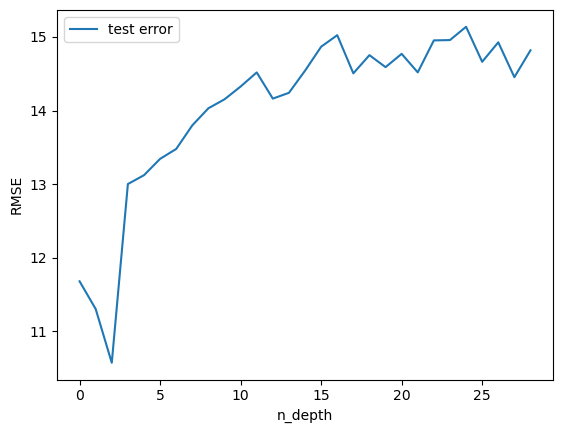

In [40]:
plt.plot(test, label = 'test error')
plt.ylabel('RMSE')
plt.xlabel('n_depth')
plt.legend()

In [41]:
tree_model = DecisionTreeRegressor(max_depth = 2)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [42]:
tree_pred = tree_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('R2 value is = ',round(r2_score(y_test, tree_pred), 2))
mse = mean_squared_error (y_test, tree_pred)
mae = mean_absolute_error (y_test, tree_pred)
print('The mse of the model is = ',mse)
print('The root mse of the model is = ', np.sqrt(mse))
print('The mean absolute error of the model is = ', mae)

R2 value is =  0.33
The mse of the model is =  127.79294147644201
The root mse of the model is =  11.304554014928764
The mean absolute error of the model is =  5.622743919642963


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [20,50],
    'max_depth': [2,3],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'bootstrap': [True, False]
    }

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
RMSE: 10.38860664499106


In [45]:
best_model

RandomForestRegressor(max_depth=3, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=20)

In [46]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=20)

In [47]:
best_pred = best_model.predict(X_test)

print('R2 value is = ', round(r2_score(y_test, best_pred),2))
mse = mean_squared_error (y_test, best_pred)
mae = mean_absolute_error (y_test, best_pred)
print('The mse of the model is = ', mse)
print('The root mse of the model is = ', np.sqrt(mse))
print('The mean absolute error of the model is = ', mae)

R2 value is =  0.44
The mse of the model is =  105.81460032895573
The root mse of the model is =  10.286622396537929
The mean absolute error of the model is =  4.6885072701515975
